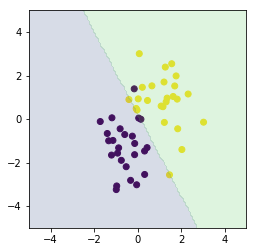

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1234)
x0 = np.random.normal(size=50).reshape(-1, 2) - 1
x1 = np.random.normal(size=50).reshape(-1, 2) + 1

x_train, t_train = (np.concatenate([x0, x1]), np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int))
x1_test, x2_test = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T

X0 = x_train[t_train == 0]
X1 = x_train[t_train == 1]
m0 = np.mean(X0, axis=0)
m1 = np.mean(X1, axis=0)
cov_inclass = (X0 - m0).T @ (X0 - m0) + (X1 - m1).T @ (X1 - m1)
w = np.linalg.solve(cov_inclass, m1 - m0)
w /= np.linalg.norm(w).clip(min=1e-10)

mu0 = np.mean(X0 @ w, axis=0)
mu1 = np.mean(X1 @ w, axis=0)
var0 = np.var(X0 @ w, axis=0)
var1 = np.var(X1 @ w, axis=0)
a = var1 - var0
b = var0 * mu1 - var1 * mu0
c = var1 * mu0 ** 2 - var0 * mu1 ** 2 - var1 * var0 * np.log(var1 / var0)
threshold = (np.sqrt(b ** 2 - a * c) - b) / a

t = (x_test @ w > threshold).astype(np.int)

plt.scatter(x_train[:, 0], x_train[:, 1], c=t_train)
plt.contourf(x1_test, x2_test, t.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()